In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
varc = ['sofifa_id','long_name','value_eur']
X = df[varc]
X.head()

,sofifa_id,long_name,value_eur
0,158023,Lionel Andrés Messi Cuccittini,95500000
1,20801,Cristiano Ronaldo dos Santos Aveiro,58500000
2,190871,Neymar da Silva Santos Junior,105500000
3,200389,Jan Oblak,77500000
4,183277,Eden Hazard,90000000


## n_quantiles = 10

In [4]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal', subsample=1000)
transformer.fit(X[['value_eur']])
X1 = pd.DataFrame(transformer.transform(df[['value_eur']]),columns=['value_eur'])

In [5]:
X[['value_eur']].describe(percentiles=np.arange(0,1,.1))

,value_eur
count,1.827800e+04
mean,2.484038e+06
std,5.585481e+06
min,0.000000e+00
0%,0.000000e+00
10%,1.400000e+05
20%,2.600000e+05
30%,4.000000e+05
40%,5.250000e+05
50%,7.000000e+05


In [6]:
transformer.quantiles_

array([[       0.],
       [  150000.],
       [  300000.],
       [  450000.],
       [  625000.],
       [  825000.],
       [ 1100000.],
       [ 2300000.],
       [ 5500000.],
       [50000000.]])

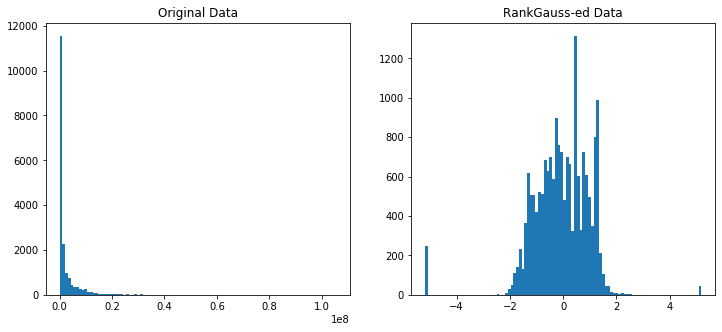

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(X['value_eur'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(X1['value_eur'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()

## Muestra pequeña

In [8]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal', subsample=100)
transformer.fit(X[['value_eur']])
X2 = pd.DataFrame(transformer.transform(df[['value_eur']]),columns=['value_eur'])

In [9]:
X[['value_eur']].describe(percentiles=np.arange(0,1,.1))

,value_eur
count,1.827800e+04
mean,2.484038e+06
std,5.585481e+06
min,0.000000e+00
0%,0.000000e+00
10%,1.400000e+05
20%,2.600000e+05
30%,4.000000e+05
40%,5.250000e+05
50%,7.000000e+05


In [10]:
transformer.quantiles_

array([[       0.],
       [  220000.],
       [  375000.],
       [  475000.],
       [  675000.],
       [  925000.],
       [ 1100000.],
       [ 1900000.],
       [ 5500000.],
       [33000000.]])

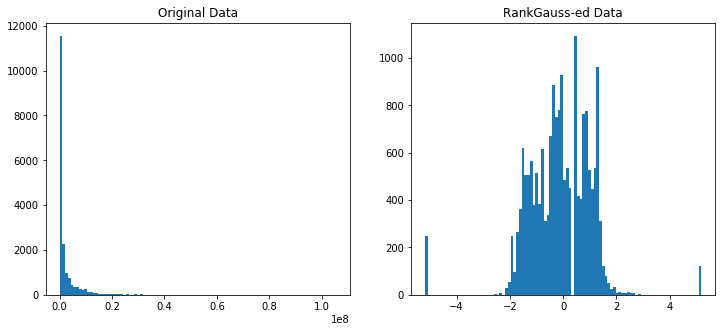

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(X['value_eur'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(X2['value_eur'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()

## Más cuantiles y muestra grande

In [12]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=1000, random_state=1111, output_distribution='normal', subsample=15000)
transformer.fit(X[['value_eur']])
X3 = pd.DataFrame(transformer.transform(df[['value_eur']]),columns=['value_eur'])

In [13]:
X[['value_eur']].describe(percentiles=np.arange(0,1,.1))

,value_eur
count,1.827800e+04
mean,2.484038e+06
std,5.585481e+06
min,0.000000e+00
0%,0.000000e+00
10%,1.400000e+05
20%,2.600000e+05
30%,4.000000e+05
40%,5.250000e+05
50%,7.000000e+05


In [14]:
transformer.quantiles_[[0,100,200,300,400,500,600,700,800,900,999]]

array([[       0.],
       [  140000.],
       [  260000.],
       [  400000.],
       [  550000.],
       [  725000.],
       [  950000.],
       [ 1400000.],
       [ 3000000.],
       [ 6500000.],
       [90000000.]])

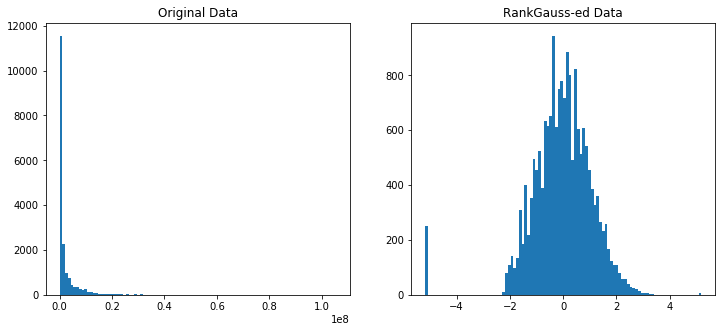

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(X['value_eur'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(X3['value_eur'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()